<a href="https://colab.research.google.com/github/dsgustavomoreira/Qualidade-do-Vinho/blob/main/Qualidade_do_Vinho_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1º - Problema de Negócio**

O objetivo deste caso é desenvolver um Sistema de Classificação da Qualidade do Vinho. Para tanto, foi utilizada  a base "winequality-red.csv", disponível no Kaggle.

Arquitetura dos Dados:

*   fixed acidity
*   volatile acidity
*   citric acid
*   chlorides
*   free sulfur dioxide
*   total sulfur dioxide
*   density
*   pH
*   sulphates
*   alcohol
*   quality: Variável TARGET

# **2º - Análise Exploratória dos Dados:**

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [285]:
dfvinho = pd.read_csv('/content/drive/MyDrive/DS Gustavo Moreira/Qualidade do Vinho/winequality-red.csv')

In [286]:
dfvinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [287]:
dfvinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [288]:
dfvinho.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [289]:
dfvinho.duplicated().sum()

240

In [290]:
duplicados = dfvinho[dfvinho.duplicated()].index.unique()
print(duplicados)

Int64Index([   4,   11,   27,   40,   65,   76,   91,   93,  102,  105,
            ...
            1520, 1522, 1557, 1560, 1561, 1563, 1564, 1567, 1581, 1596],
           dtype='int64', length=240)


In [291]:
dfvinho.iloc[[1561, 1560]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1561,7.8,0.6,0.26,2.0,0.08,31.0,131.0,0.99622,3.21,0.52,9.9,5
1560,7.8,0.6,0.26,2.0,0.08,31.0,131.0,0.99622,3.21,0.52,9.9,5


In [292]:
# excluindo os rgistro duplicados
dfvinho.drop_duplicates(inplace=True)

In [293]:
dfvinho.shape

(1359, 12)

In [294]:
dfvinho.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [295]:
# Analisando a variável target
dfvinho['quality'].nunique()

6

In [296]:
# Analisando a variável target
dfvinho['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [297]:
# Analisando a variável target
dfvinho['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

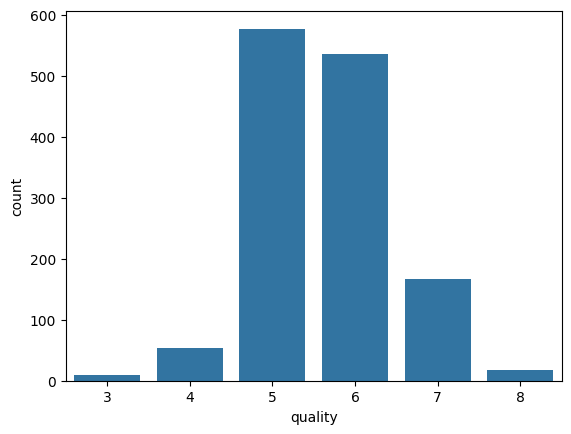

In [298]:
#plt.figure(figsize=(10,6))
sns.countplot(data=dfvinho, x='quality')

<Axes: xlabel='quality', ylabel='fixed acidity'>

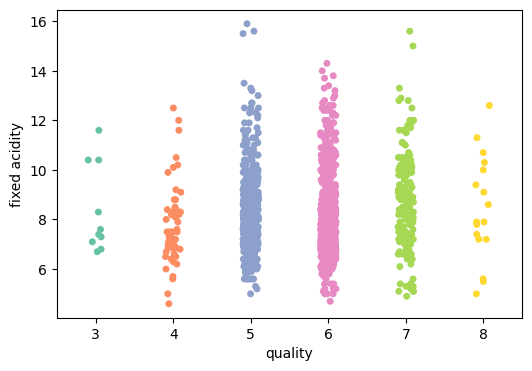

In [299]:
# Optou-se por utilizar o 'stripplot' para que todos os valores do eixo y fossem exibidos
fig = plt.figure(figsize = (6,4))
sns.stripplot(data = dfvinho, x = 'quality', y = 'fixed acidity', palette='Set2', jitter=True)

<Axes: xlabel='quality', ylabel='volatile acidity'>

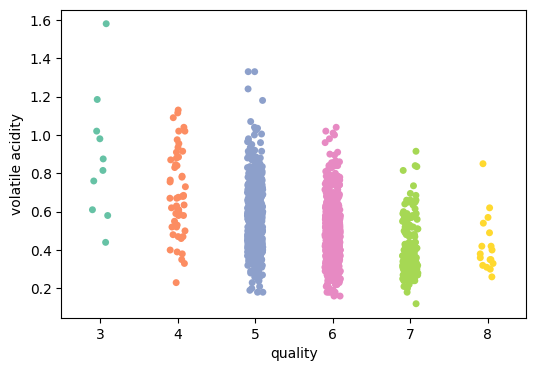

In [300]:
fig = plt.figure(figsize = (6,4))
sns.stripplot(data = dfvinho, x = 'quality', y = 'volatile acidity', palette='Set2', jitter=True)

<Axes: xlabel='quality', ylabel='citric acid'>

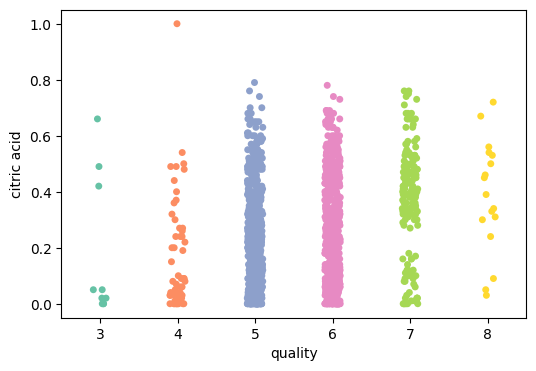

In [301]:
fig = plt.figure(figsize = (6,4))
sns.stripplot(data = dfvinho, x = 'quality', y = 'citric acid', palette='Set2', jitter=True)

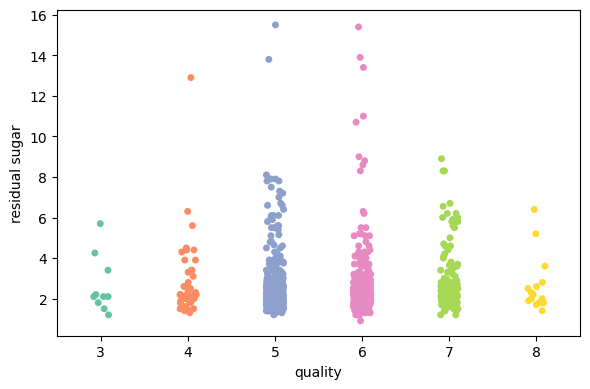

In [302]:
fig = plt.figure(figsize = (6,4))
sns.stripplot(data=dfvinho, x='quality', y='residual sugar', palette='Set2', jitter=True)
plt.tight_layout()

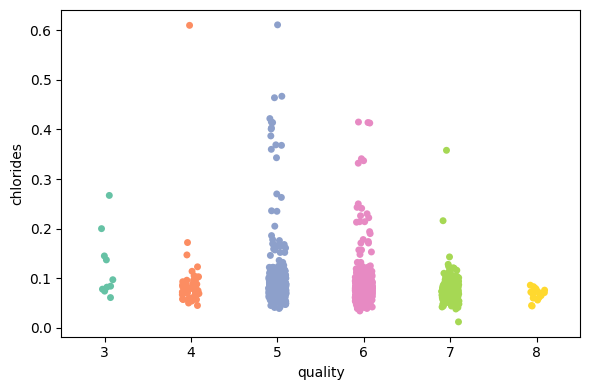

In [303]:
fig = plt.figure(figsize = (6,4))
sns.stripplot(data=dfvinho, x='quality', y='chlorides', palette='Set2', jitter=True)
plt.tight_layout()

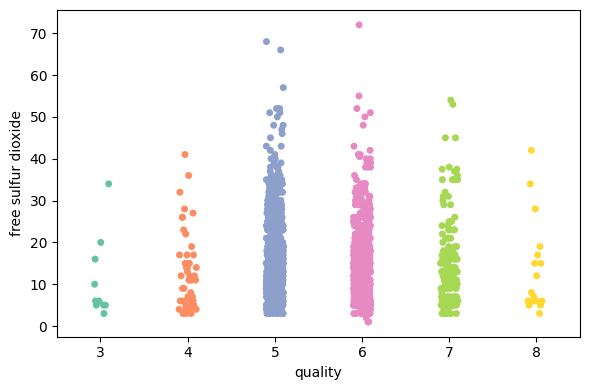

In [304]:
fig = plt.figure(figsize = (6,4))
sns.stripplot(data=dfvinho, x='quality', y='free sulfur dioxide', palette='Set2', jitter=True)
plt.tight_layout()

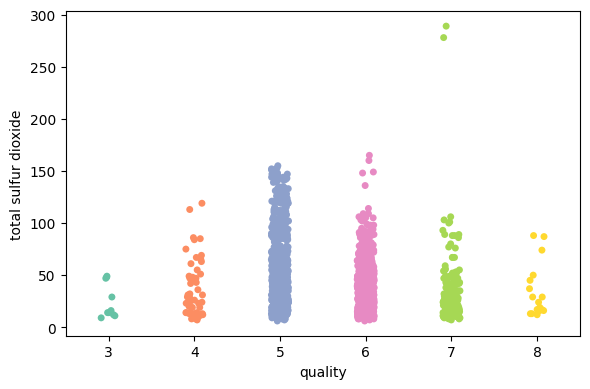

In [305]:
fig = plt.figure(figsize = (6,4))
sns.stripplot(data=dfvinho, x='quality', y='total sulfur dioxide', palette='Set2', jitter=True)
plt.tight_layout()

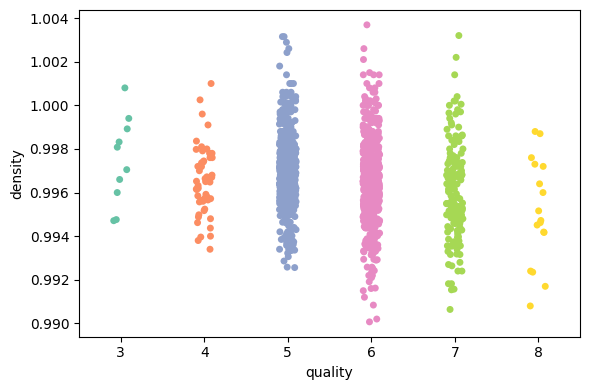

In [306]:
fig = plt.figure(figsize = (6,4))
sns.stripplot(data=dfvinho, x='quality', y='density', palette='Set2', jitter=True)
plt.tight_layout()

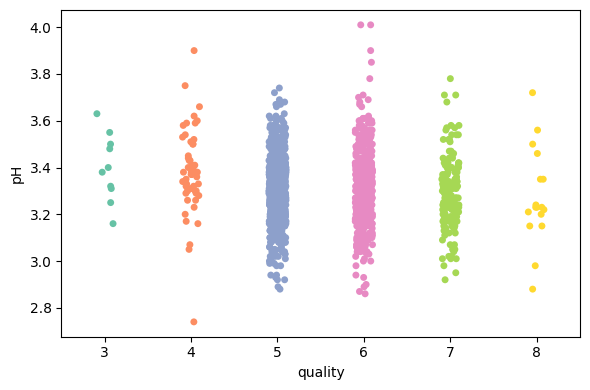

In [307]:
fig = plt.figure(figsize = (6,4))
sns.stripplot(data=dfvinho, x='quality', y='pH', palette='Set2', jitter=True)
plt.tight_layout()

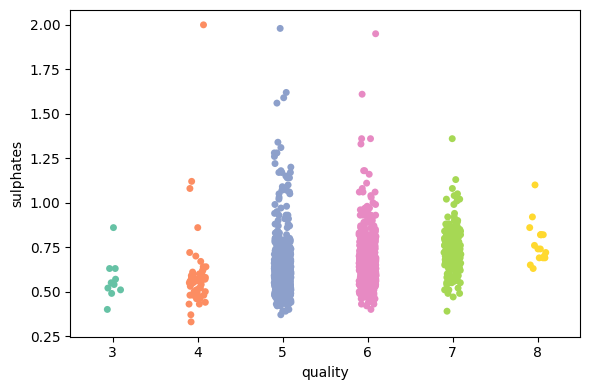

In [308]:
fig = plt.figure(figsize = (6,4))
sns.stripplot(data=dfvinho, x='quality', y='sulphates', palette='Set2', jitter=True)
plt.tight_layout()

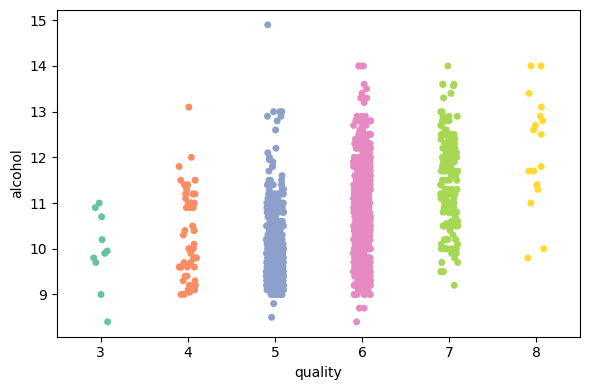

In [309]:
fig = plt.figure(figsize = (6,4))
sns.stripplot(data=dfvinho, x='quality', y='alcohol', palette='Set2', jitter=True)
plt.tight_layout()

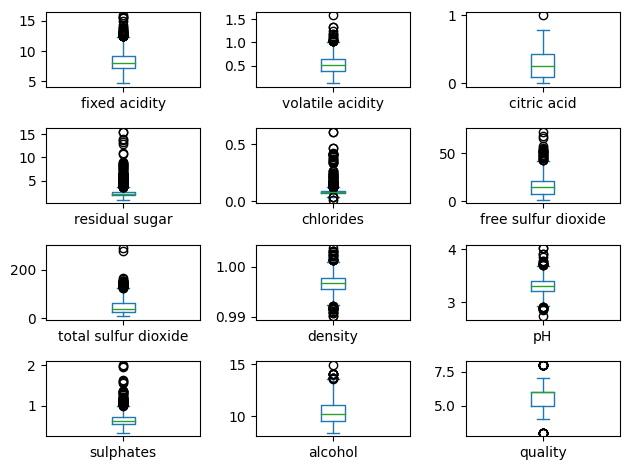

In [310]:
dfvinho.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()
#sns.boxplot(data=dfvinho, x='fixed acidity')

In [311]:
# Define a função para identificar outliers usando IQR
def identificar_outliers(coluna):
    q3 = coluna.quantile(0.75)
    q1 = coluna.quantile(0.25)
    iqr = q3 - q1
    limite_superior = q3 + 1.5 * iqr
    return coluna > limite_superior

# Seleciona as colunas 'pH' e 'density' para análise
colunas_analise = ['pH', 'density',  'fixed acidity', 'volatile acidity', 'citric acid',
                   'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'sulphates', 'alcohol']

# Inicializa um DataFrame vazio para armazenar os resultados
resultados_outliers = pd.DataFrame()

# Itera sobre as colunas selecionadas
for coluna in colunas_analise:
    # Aplica a função para identificar outliers na coluna atual
    outliers_na_coluna = identificar_outliers(dfvinho[coluna])

    # Adiciona a série de outliers da coluna ao DataFrame de resultados
    resultados_outliers[coluna] = outliers_na_coluna

# Exibe o número de outliers por feature
numero_outliers_por_feature = resultados_outliers.sum()
numero_total_outliers = resultados_outliers.sum().sum()
print('Número de outliers por feature: ', numero_outliers_por_feature)
print('Número total de outliers: ', numero_total_outliers)

Número de outliers por feature:  pH                       17
density                  17
fixed acidity            41
volatile acidity         19
citric acid               1
residual sugar          126
chlorides                83
free sulfur dioxide      26
total sulfur dioxide     45
sulphates                55
alcohol                  12
dtype: int64
Número total de outliers:  442


In [312]:
# Tendo em vista a quantidade de varíaveis que possuem outliers, optou-se por fazer estudos mais aprofundados e
# eventuais exclusões nas variáveis 'residual sugar' (126) e 'chlorides' (83).

In [313]:
dfvinho.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [314]:
dfvinho.shape

(1359, 12)

In [315]:
# Tratamento de outliers para VARIÁVEL 'residual sugar' (126):
# No caso da fronteira superior, a análise dos outliers se dará por: valor da média + (3 * desvio padrão)
# No caso da fronteira inerior, a análise dos outliers se dará por: valor da média - (3 * desvio padrão)
# Foi utilizado 3 desvios padrão a fim de considerar uma parcela maior dos outliers

fsuperior = dfvinho['residual sugar'].mean() + 3 * dfvinho['residual sugar'].std()
print(fsuperior)

finferior = dfvinho['residual sugar'].mean() - 3 * dfvinho['residual sugar'].std()
print(finferior)

6.5803408316301635
-1.5335417146323707


In [316]:
for x in dfvinho['residual sugar']:
    if (x > fsuperior):
       print(x)


10.7
7.3
7.2
7.0
11.0
7.9
6.7
6.6
15.5
8.3
7.9
8.6
7.5
6.6
9.0
8.8
8.9
8.1
8.3
8.3
7.8
12.9
13.4
15.4
13.8
6.7
13.9
7.8


In [317]:
fsuperior = dfvinho['residual sugar'].mean() + 3 * dfvinho['residual sugar'].std()
print(fsuperior)


6.5803408316301635


In [318]:
# Eliminação dos outliers acima do valor da média + (3 * desvio padrão)
dfvinho = dfvinho.drop(dfvinho[dfvinho['residual sugar'] > fsuperior].index)

In [319]:
dfvinho.shape

(1331, 12)

In [320]:
# No caso de limite inferior da variável 'residual sugar' não houve outlier
for x in dfvinho['residual sugar']:
    if (x < finferior):
       print(x)

In [321]:
# Tratamento de outlier para VARIÁVEL 'chlorides' (83)
# No caso da fronteira superior, a análise dos outliers se dará por: valor da média + (3 * desvio padrão)
# No caso da fronteira inerior, a análise dos outliers se dará por: valor da média - (3 * desvio padrão)
# Foi utilizado 3 desvios padrão a fim de considerar uma parcela maior dos outliers

fsuperiorchlorides = dfvinho['chlorides'].mean() + 3 * dfvinho['chlorides'].std()
print(fsuperiorchlorides)

finferiorchlorides = dfvinho['chlorides'].mean() - 3 * dfvinho['chlorides'].std()
print(finferiorchlorides)

0.23622576811018137
-0.06026183122062467


In [322]:
for x in dfvinho['chlorides']:
    if (x > fsuperiorchlorides):
       print(x)

0.368
0.341
0.332
0.4639999999999999
0.401
0.467
0.61
0.36
0.27
0.337
0.263
0.611
0.358
0.3429999999999999
0.413
0.25
0.422
0.387
0.415
0.243
0.241
0.414
0.369
0.4029999999999999
0.414
0.415
0.267


In [323]:
fsuperiorchlorides = dfvinho['chlorides'].mean() + 3 * dfvinho['chlorides'].std()
print(fsuperiorchlorides)

0.23622576811018137


In [324]:
# Eliminação dos outliers acima do valor da média + (3 * desvio padrão)
dfvinho = dfvinho.drop(dfvinho[dfvinho['chlorides'] > fsuperiorchlorides].index)

In [325]:
# No caso de limite inferior da variável 'chlorides' não houve outlier
for x in dfvinho['chlorides']:
    if (x < finferiorchlorides):
       print(x)

In [326]:
# No caso de limite inferior não houve outlier
for x in dfvinho['residual sugar']:
    if (x < finferior):
       print(x)

In [327]:
dfvinho.shape

(1304, 12)

In [328]:
dfvinho['quality'].value_counts()

5    548
6    517
7    162
4     51
8     17
3      9
Name: quality, dtype: int64

In [329]:
dfvinho['quality'].value_counts().sum()

1304

In [330]:
# Criação de categoria para a feature 'quality', sendo:
# '0' para valores 3, 4 e 5 e '1' para valores 6, 7 e 8'
# astype(int) para converter True em 1 e False em 0
# Será adotada a perspectiva de que '0' a qualidade é ruim e '1' a qualidade é boa
dfvinho['quality'] = (dfvinho['quality'].isin([6, 7, 8])).astype(int)

In [331]:
dfvinho['quality'].value_counts()

1    696
0    608
Name: quality, dtype: int64

In [332]:
dfvinho['quality'].value_counts().sum()

1304

In [333]:
matrizcor = dfvinho.corr()

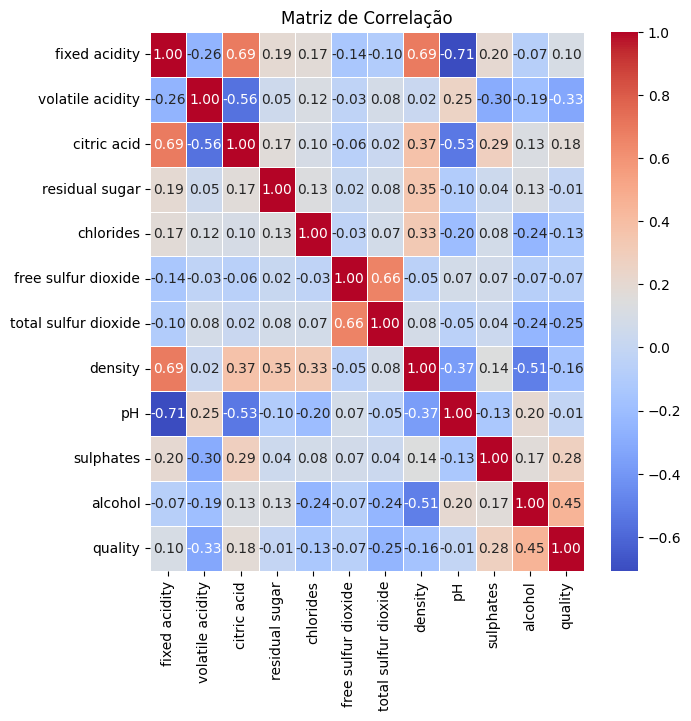

In [334]:
plt.figure(figsize=(7,7))
sns.heatmap(matrizcor, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [335]:
# A Matriz de Correlação apresentou que a feature 'fixed acidity' possui elevada correlação positiva com as
# variáveis 'citric acid' (0,67) e 'density (0,67), bem como elevada correlação negativa com a variável
# 'sulphates' (-0,68), por isso optou-se pela exclusão da variável 'fixed acidity'.
# Analisou-se também o grau de correlação entre as variáveis 'citric acid', 'density' e 'sulphato',
# mas os valores encontrados não apresentaram elevada correlação.

In [336]:
dfvinho.drop(['fixed acidity'], axis = 1, inplace=True)

In [337]:
dfvinho.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


# **3º - Pré-Processamento dos Dados:**

In [338]:
X = dfvinho.drop('quality', axis=1)
y = dfvinho['quality']

In [339]:
X.shape

(1304, 10)

In [340]:
y.shape

(1304,)

In [341]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [342]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **4º - Aplicação do Algoritmo Random Forest Classifier**

In [343]:
rfc = RandomForestClassifier(n_estimators=5000, criterion='entropy', max_depth=50, min_samples_leaf=1)
rfc.fit(X_train, y_train)
rfcprevisao = rfc.predict(x_test)

In [344]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [345]:
cm = confusion_matrix(y_test, rfcprevisao)
cr = classification_report(y_test, rfcprevisao)
ac = accuracy_score(y_test, rfcprevisao)
print(cm)
print(cr)

[[131  41]
 [ 55 165]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       172
           1       0.80      0.75      0.77       220

    accuracy                           0.76       392
   macro avg       0.75      0.76      0.75       392
weighted avg       0.76      0.76      0.76       392



In [346]:
# Tendo em vista os baixos valores de 'f1-score' e 'accuracy', optou-se pela técnica de Random Search
param = {
      'n_estimators': randint(1000, 2000),
      'max_depth': randint(20, 50),
      'criterion': ['entropy', 'gini'],
      'min_samples_split': randint(2, 5),
      'min_samples_leaf': randint(1, 3),
      'bootstrap': [True],
      'max_features': ['auto', 'sqrt', 'log2']
}

RSrfc=RandomizedSearchCV(rfc, param_distributions=param, n_iter=5, cv=5)

In [347]:
RSrfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=50,
                                                    n_estimators=5000),
                   n_iter=5,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce902343790>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce902342800>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce9023418d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce9023423b0>})

In [348]:
RSrfc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 49,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 1642}

In [349]:
RSrfcprevisao = RSrfc.predict(x_test)

In [350]:
cm = confusion_matrix(y_test, RSrfcprevisao)
cr = classification_report(y_test, RSrfcprevisao)
ac = accuracy_score(y_test, RSrfcprevisao)
print(cm)
print(cr)

[[130  42]
 [ 54 166]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       172
           1       0.80      0.75      0.78       220

    accuracy                           0.76       392
   macro avg       0.75      0.76      0.75       392
weighted avg       0.76      0.76      0.76       392



# **5º - Aplicação do Algoritmo SVC**

In [351]:
svc = SVC()
svc.fit(X_train, y_train)
svcprevisao = svc.predict(x_test)

In [352]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [353]:
cm = confusion_matrix(y_test, svcprevisao)
cr = classification_report(y_test, svcprevisao)
ac = accuracy_score(y_test, svcprevisao)
print(cm)
print(cr)

[[131  41]
 [ 54 166]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       172
           1       0.80      0.75      0.78       220

    accuracy                           0.76       392
   macro avg       0.76      0.76      0.76       392
weighted avg       0.76      0.76      0.76       392



In [354]:
# Tendo em vista os baixos valores de 'f1-score' e 'accuracy', optou-se pela técnica de Random Search
param = {
      'C': (0.001, 0.01, 0.1, 1),
      'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}

RSsvc = RandomizedSearchCV(svc, param_distributions=param, n_iter=5, cv=5)

In [355]:
RSsvc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=5,
                   param_distributions={'C': (0.001, 0.01, 0.1, 1),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [356]:
RSsvc.best_params_

{'kernel': 'poly', 'C': 0.1}

In [357]:
RSsvcprevisao = RSsvc.predict(x_test)

In [358]:
cm = confusion_matrix(y_test, RSsvcprevisao)
cr = classification_report(y_test, RSsvcprevisao)
ac = accuracy_score(y_test, RSsvcprevisao)
print(cm)
print(cr)

[[130  42]
 [ 64 156]]
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       172
           1       0.79      0.71      0.75       220

    accuracy                           0.73       392
   macro avg       0.73      0.73      0.73       392
weighted avg       0.74      0.73      0.73       392



## **Conclusão e Sugestões**

*   O melhor resultado para o trabalho foi obtido com o algoritmo SVC, com a utilização da técnica Random Search.

*   O primeiro ponto a ser observado é que há ligeira alteração dos valores de f1-score e accuracy entre os modelos, por isso, buscou-se avaliar Matriz de Confusão a fim de identificar qual erro seria mais tolerável para este caso.

*   Dito isto, buscou-se identificar a Matriz de Confusão com o menor Falso Negativo (previsão de boa qualidade sendo na verdade ruim), já que neste caso haverá desapontamento na experiência de degustação. Por outro lado, a incidência de Falso Positivo (previsão de vinho ruim, sendo na verdade um bom vinho) tende a ser menos prejudicial à reputação da empresa, já que um rótulo 'teoricamente' inferior irá se apresentar superior ao previamente oferecido, causando ao cliente uma 'boa surpresa' na experiência gastronômica.

*   Sugerem-se algumas variações na metodologia deste estudo a fim de verificar o aumento da assertividade, como:
1. Divisão da categoria 'target' em 3 classes (3 e 4; 5 e 6; e, 7 e 8), ao invés de somente duas (3, 4, 5; e 6, 7, 8);
2. Aplicação de outros algoritmos, como XGBoost, haja vista a sua robustez;
3. Utilizar limite superior e inferior para outliers de 1,5 ou 2 (neste estudo considereou-se 3)
